In [ ]:
# Imports used in this notebook. This is Python 3 on Jupyter with matplotlib.
%matplotlib inline
import matplotlib.pyplot as plt
import random
from itertools   import permutations, combinations
from functools   import lru_cache as cache
from collections import Counter
from statistics  import mean, median
import pandas as pd
import time

In [ ]:
def exhaustive_tsp(cities):
    "Generate all possible tours of the cities and choose the shortest tour."
    return shortest_tour(alltours(cities))

def shortest_tour(tours): return min(tours, key=tour_length)

# TO DO: Data types: City, Cities, Tour; Functions: alltours, tour_length

In [ ]:
def exhaustive_tsp(cities):
    "Generate all possible tours of the cities and choose the shortest tour."
    return shortest_tour(alltours(cities))

def shortest_tour(tours): return min(tours, key=tour_length)

# TO DO: Data types: City, Cities, Tour; Functions: alltours, tour_length

In [ ]:
def do(algorithm, cities):
    "Apply a TSP algorithm to cities, plot the result, and print info."
    t0 = time.process_time()
    tour = algorithm(cities)
    t1 = time.process_time()
    assert Counter(tour) == Counter(cities) # Every city appears exactly once in tour
    plot_tour(tour)
    plt.text(x=461,y=295,s="City A",fontsize=10)
    plt.text(x=471,y=19,s="City B",fontsize=10)
    plt.text(x=631,y=636,s="City C",fontsize=10)
    plt.text(x=734,y=292,s="City D",fontsize=10)
    plt.text(x=74,y=79,s="City E",fontsize=10)
    print("{}: {} cities ⇒ tour length {:.0f} (in {:.3f} sec)".format(
          name(algorithm), len(tour), tour_length(tour), t1 - t0))
    
def name(algorithm): return algorithm.__name__.replace('_tsp', '')

In [ ]:
def tour_length(tour):
    """The total of distances between each pair of consecutive cities in the tour.
    This includes the last-to-first, distance(tour[-1], tour[0])"""
    return sum(distance(tour[i - 1], tour[i]) 
               for i in range(len(tour)))

City = complex

def distance(A, B): return abs(A - B)

def Cities(n, seed=391, width=999, height=666):
    "Make a set of n cities, sampled uniformly from a (width x height) rectangle."
    random.seed((n, seed))
    return frozenset(City(random.randint(1, width), random.randint(1, height))
                     for c in range(n))

In [ ]:
def plot_tour(tour, style='bo-'): 
    "Plot every city and link in the tour, and highlight start city."
    if len(tour) > 1000: plt.figure(figsize=(15, 10))
    start = tour[0:1]
    plot_segment(tour + start, style)
    plot_segment(start, 'rD') # start city is red Diamond.
    
def plot_segment(segment, style='bo-'):
    "Plot every city and link in the segment."
    plt.plot([X(c) for c in segment], [Y(c) for c in segment], style, clip_on=False)
    plt.axis('scaled')
    plt.axis('on')
    
def X(city): "X coordinate."; return city.real
def Y(city): "Y coordinate."; return city.imag

In [ ]:
def nn_tsp(cities, start=None):
    """Start the tour at the given start city (default: first city); 
    at each step extend the tour by moving from the previous city 
    to its nearest neighbor that has not yet been visited."""
    C = start or first(cities)
    tour = [C]
    unvisited = set(cities - {C})
    while unvisited:
        C = nearest_neighbor(C, unvisited)
        tour.append(C)
        unvisited.remove(C)
    return tour

def first(collection): return next(iter(collection))

def nearest_neighbor(A, cities):
    "Find the city in cities that is nearest to city A."
    return min(cities, key=lambda C: distance(C, A))

In [ ]:
Cities(5)


frozenset({(461+295j), (471+19j), (631+636j), (734+292j), (74+79j)})

In [ ]:
nn_tsp(Cities(5))

[(461+295j), (734+292j), (631+636j), (471+19j), (74+79j)]

In [ ]:
tour_length(nn_tsp(Cities(5)))

2114.2206479983547

nn: 5 cities ⇒ tour length 2114 (in 0.000 sec)


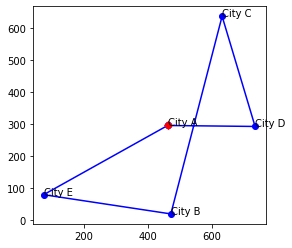

In [ ]:
do(nn_tsp,Cities(5))

Text(734, 292, 'City D')

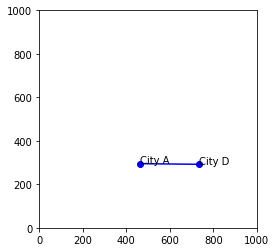

In [ ]:
plot_segment([(461+295j), (734+292j)])
plt.axis('scaled')
plt.axis([0, 1000, 0, 1000])
plt.text(x=461,y=295,s="City A",fontsize=10)
plt.text(x=734,y=292,s="City D",fontsize=10)

Text(631, 636, 'City C')

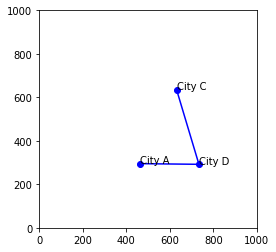

In [ ]:
plot_segment([(461+295j), (734+292j),(631+636j)])
plt.axis('scaled')
plt.axis([0, 1000, 0, 1000])
plt.text(x=461,y=295,s="City A",fontsize=10)
plt.text(x=734,y=292,s="City D",fontsize=10)
plt.text(x=631,y=636,s="City C",fontsize=10)

Text(471, 19, 'City B')

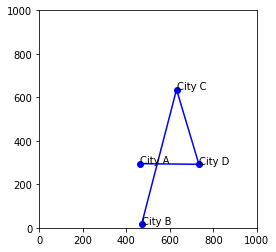

In [ ]:
plot_segment([(461+295j), (734+292j),(631+636j),(471+19j)])
plt.axis('scaled')
plt.axis([0, 1000, 0, 1000])
plt.text(x=461,y=295,s="City A",fontsize=10)
plt.text(x=734,y=292,s="City D",fontsize=10)
plt.text(x=631,y=636,s="City C",fontsize=10)
plt.text(x=471,y=19,s="City B",fontsize=10)

Text(74, 79, 'City E')

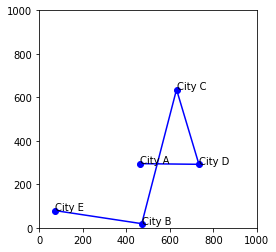

In [ ]:
plot_segment([(461+295j), (734+292j),(631+636j),(471+19j),(74+79j)])
plt.axis('scaled')
plt.axis([0, 1000, 0, 1000])
plt.text(x=461,y=295,s="City A",fontsize=10)
plt.text(x=734,y=292,s="City D",fontsize=10)
plt.text(x=631,y=636,s="City C",fontsize=10)
plt.text(x=471,y=19,s="City B",fontsize=10)
plt.text(x=74,y=79,s="City E",fontsize=10)


Text(74, 79, 'City E')

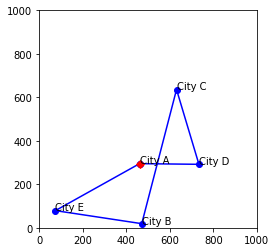

In [ ]:
plot_tour([(461+295j), (734+292j),(631+636j),(471+19j),(74+79j)])
plt.axis('scaled')
plt.axis([0, 1000, 0, 1000])
plt.text(x=461,y=295,s="City A",fontsize=10)
plt.text(x=734,y=292,s="City D",fontsize=10)
plt.text(x=631,y=636,s="City C",fontsize=10)
plt.text(x=471,y=19,s="City B",fontsize=10)
plt.text(x=74,y=79,s="City E",fontsize=10)


In [ ]:
df1=[]
df2=[]
df3=[]
df=[]
for i in range(100,1025,25):
  t0 = time.process_time()
  nn_tsp(Cities(i))
  t1 = time.process_time()
  df1.append(i)
  df2.append(t1-t0)
  df3.append(tour_length(nn_tsp(Cities(i))))
df=pd.DataFrame({'Πλήθος Πόλεων':df1,'Χρόνος Εκτέλεσης':df2,"Κόστος Διαδρομής":df3})

In [ ]:
df
#from google.colab import files
#df.to_csv('output.csv', encoding = 'utf-8-sig') 
#files.download('output.csv')

,Πλήθος Πόλεων,Χρόνος Εκτέλεσης,Κόστος Διαδρομής
0,100,0.003711,8683.408432
1,125,0.004133,7935.968999
2,150,0.005898,9857.483113
3,175,0.007881,9921.454394
4,200,0.010374,9961.679020
5,225,0.011920,11774.072496
6,250,0.014471,12176.224712
7,275,0.020790,12495.781690
8,300,0.023255,13664.891486
9,325,0.028122,13611.656666
